# KMeans Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the 
same groups are more similar to other data points in the same group and dissimilar to the data points in other groups.

The k-means cluster algorithm mainly performs two important tasks:
▪ Determines the best value for K center points or centroids by an iterative process.
▪ Assigns each data point to its closest k-center (also called centroid). Those data points which 
are near to the particular k-center, create a cluster.

# Importing All Important Libary & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score' }, inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop("CustomerID",axis = 1 , inplace = True)

In [9]:
df.head(10)

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [10]:
df.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Visualization

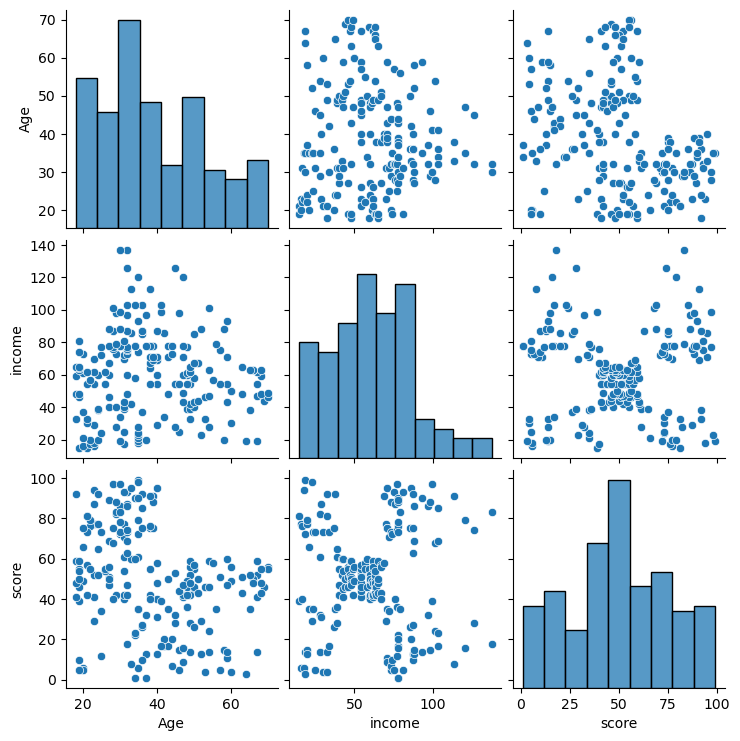

In [11]:
#pairplot
import seaborn as sns
sns.pairplot(df[['Age', 'income','score']])


# Optimization / Tunning

In [12]:
from sklearn.cluster import KMeans

In [13]:

wcss = []
cluster = range(1,15)

for k in cluster :
    km1 = KMeans(n_clusters=k)
    km1.fit(df[['income','score']])
    wcss.append(km1.inertia_)

C:\Users\ashik\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 31280.903845940935,
 25030.38309852033,
 21806.81299869546,
 20030.071428571428,
 17636.64997270032,
 15845.619372815672,
 14531.914546727783,
 13050.48456292811]

In [15]:
plt.figure(figsize=(10,6))
plt.plot(cluster, wcss,'go--')
plt.title('Elbow Method')

Text(0.5, 1.0, 'Elbow Method')

In [16]:
!pip install kneed

In [17]:
from kneed import KneeLocator

In [18]:
kn = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [19]:
kn.knee

5

In [20]:
plt.figure(figsize=(10,6))
kn.plot_knee()

# Kmeans Model

In [21]:
km2 = KMeans(n_clusters=5)
predicted = km2.fit_predict(df[['income', 'score']])

In [22]:
df['initial_clusters'] = predicted

In [23]:
df.head()

,Gender,Age,income,score,initial_clusters
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


In [24]:
center = km2.cluster_centers_

In [25]:
center

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [26]:
plt.figure(figsize=(15,10))

df0 = df[df.initial_clusters == 0]
df1 = df[df.initial_clusters == 1]
df2 = df[df.initial_clusters == 2]
df3 = df[df.initial_clusters == 3]
df4 = df[df.initial_clusters == 4]

plt.scatter(df0['income'], df0['score'], color='orange',label='Cluster 0')
plt.scatter(df1['income'], df1['score'], color='cyan',label='Cluster 1')
plt.scatter(df2['income'], df2['score'], color='pink',label='Cluster 2')
plt.scatter(df3['income'], df3['score'], color='green',label='Cluster 3')
plt.scatter(df4['income'], df4['score'], color='yellow',label='Cluster 4')

#centroids
plt.scatter(center[:,0], center[:,1], color='red', label='centroid')

plt.legend()

Thanks For Watching